In [1]:
library("igraph")
# read data file
usair <- read.graph("USAir97.net","pajek")


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [2]:
library("repr")  #For resizing plots

# Change plot size to 5 x 4
options(repr.plot.width=5, repr.plot.height=4)

## Summary

•	Import dataset in package of your choice <br>
•	Calculate number of nodes, number of edges, density <br>
•	Calculate degree and plot degree distribution <br>
•	Describe degree distribution properties  <br>
•	Calculate betweenness if appropriate <br>
•	Identify the node with the highest degree <br>
•	Plot the network and identify the nodes with the highest centrality <br>
•	Remove the nodes with the highest centrality and rerun the plot. What has happened? How many nodes do you have to remove before the network structure starts to collapse?


### Info

In [3]:
is.directed(usair)
is.weighted(usair) # Strenght of the link: higher value=stronger link

[1] FALSE

[1] TRUE

### Extract Vertices

In [4]:
#V(usair) - will return the name
#V(usair)$weight  #if weight available, outputs it
#V(usair)$id   
V(usair)[3]      #[1] Ralph Wien Memorial
V(usair)[3]$id   #[1] "Ralph Wien Memorial" (Notice the quotes)
vcount(usair)    #332

+ 1/332 vertex, named, from 8c9f0ce:
[1] Ralph Wien Memorial

[1] "Ralph Wien Memorial"

[1] 332

### Extract Edges

In [5]:
E(usair)[1:10]
E(usair)[1:10]$weight
ecount(usair) #Count of edges

+ 10/2126 edges from 8c9f0ce (vertex names):
 [1] Chicago O'hare Intl--San Francisco Intl          
 [2] Chicago O'hare Intl--Phoenix Sky Harbor Intl     
 [3] Chicago O'hare Intl--Lambert-St Louis Intl       
 [4] Chicago O'hare Intl--Pittsburgh Intll            
 [5] Chicago O'hare Intl--Philadelphia Intl           
 [6] Seattle-Tacoma Intl--Chicago O'hare Intl         
 [7] Chicago O'hare Intl--Salt Lake City Intl         
 [8] Chicago O'hare Intl--San Diego Intl-Lindbergh Fld
 [9] Chicago O'hare Intl--Tampa Intl                  
[10] Chicago O'hare Intl--Raleigh-Durham Intll        

[1] 0.1804 0.1474 0.0332 0.0416 0.0676 0.1828 0.1231 0.1733 0.1366 0.0745

[1] 2126

In [6]:
ends(usair,20)   #outputs the edge ID at index 20
#E(usair)[20]    #outputs the edge at index 20
head_of(usair,1)
tail_of(usair,1)
ends(usair,20:30)

Chicago O'hare Intl,Tulsa Intl


+ 1/332 vertex, named, from 8c9f0ce:
[1] San Francisco Intl

+ 1/332 vertex, named, from 8c9f0ce:
[1] Chicago O'hare Intl

Chicago O'hare Intl,Tulsa Intl
Chicago O'hare Intl,Norfolk Intl
Chicago O'hare Intl,Tucson Intl
Syracuse Hancock Intl,Chicago O'hare Intl
Bangor Intl,Chicago O'hare Intl
Greater Rochester Intl,Chicago O'hare Intl
Chicago O'hare Intl,Theodore Francis Green State
Chicago O'hare Intl,Louisville Intl
Chicago O'hare Intl,Sarasota/Bradenton Intl
Chicago O'hare Intl,Richmond Intll
Chicago O'hare Intl,Mc Ghee Tyson


### Density

In [7]:
graph.density(usair)   #0.03869253 (number of edges/(N(N-1)/2))
ecount(usair)/((vcount(usair)*vcount(usair)-1)/2)   
#It's not mapping properly

[1] 0.03869253

[1] 0.03857634

### Degree

In [8]:
us_deg <- degree(usair)
mean(us_deg)     #12.80723

[1] 12.80723

### Weighted Degree

[1] 0.9240145

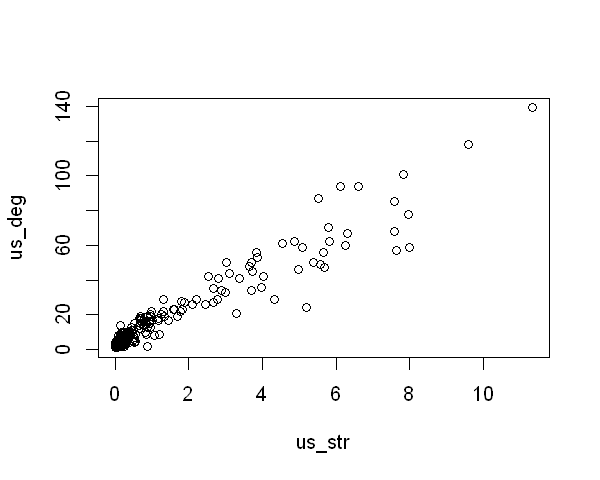

In [9]:
us_str <- strength(usair)
mean(us_str)     #0.9240145
plot(us_str,us_deg)    #Plot of strength degree vs normal degree (Is the relation linear?)

### Degree Distribution

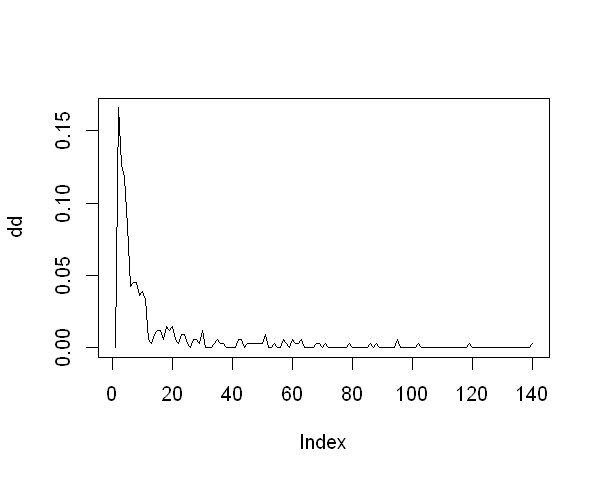

In [10]:
dd <- degree_distribution(usair)
plot(dd,type='l')
#plot(degree_distribution(usair),type="l") #Same, except will show degree distribution label on y axis

### Distance

In [11]:
distances(usair,v=5)  #http://igraph.org/r/doc/distances.html
max(distances(usair)) #0.9623
mean_distance(usair)  #2.738125 - A small world

,Wiley Post-Will Rogers Mem,Deadhorse,Ralph Wien Memorial,Fairbanks Intl,Nome,St Mary's,Aniak,Anchorage Intl,Tuluksak,Akiachak,...,Eugenio Maria De Hostos,Mercedita,Alexander Hamilton,Johnston Atoll,Saipan Intl,Rota Intl,Guam Intll,Babelthuap/Koror,Pago Pago Intl,West Tinian
Nome,0.1875,0.1715,0.0269,0.1214,0,0.1532,0.1337,0.0849,0.1506,0.1476,...,0.6823,0.6772,0.6856,0.5414,0.7852,0.7759,0.7689,0.8473,0.8146,0.7865


[1] 0.9623

[1] 2.738125

### Closeness
#### Degree-Closeness plot

Nome 
0.0009460738

Nome 
1057

[1] 1057

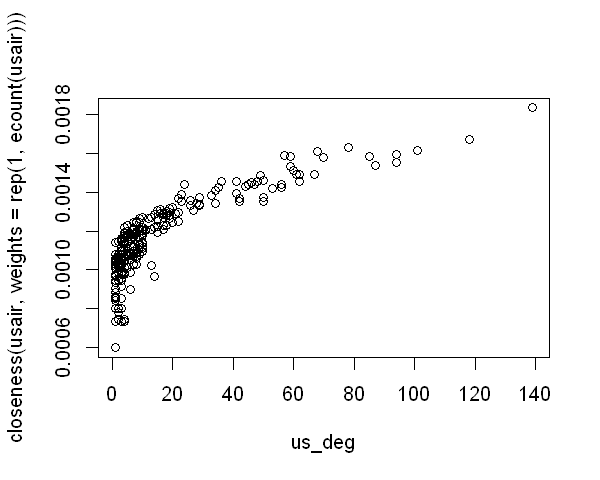

In [12]:
#closeness(usair, weights = rep(1,ecount(usair)))     #Closeness for all nodes
closeness(usair,vids=5,weights=rep(1,ecount(usair)))  #Closeness for vertex id 5
#rep is a replicate function which replicates 1 ecount times
1/closeness(usair,vids=5,weights=rep(1,ecount(usair)))
sum(distances(usair,v=5,weights=rep(1,ecount(usair))))

plot(us_deg, closeness(usair, weights = rep(1,ecount(usair))))  #Degree-Closeness plot
#plot(log(us_deg), closeness(usair, weights = rep(1,ecount(usair))))  #log(Degree)-Closeness plot

#### Closeness-Degree plot

Nome 
0.006884331

Nome 
0.0009460738

Nome 
145.2574

[1] 142.8078

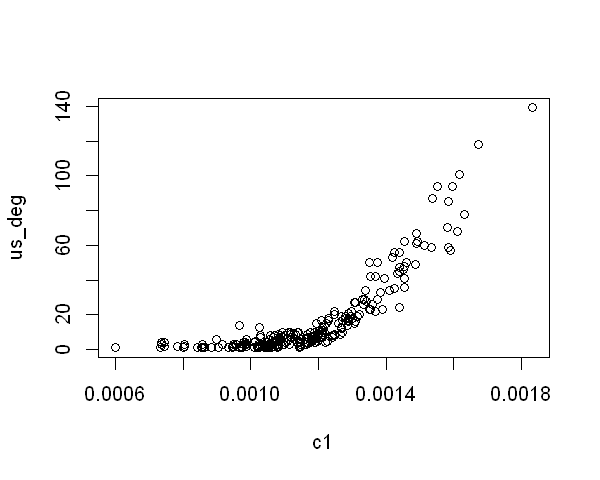

In [13]:
c1 = closeness(usair,weights=rep(1,ecount(usair)))
closeness(usair,vids=5)                               #0.006884331
closeness(usair,vids=5,weights=rep(1,ecount(usair)))  #0.0009460738
1/closeness(usair,vids=5)
sum(distances(usair,v=5))
plot(c1,us_deg)   #Closeness-Degree plot

### Betweenness
#### Degree-Betweenness plot

[1] 0.7267401

+ 1/1 vertex, named, from 8e6c88a:
[1] Anchorage Intl

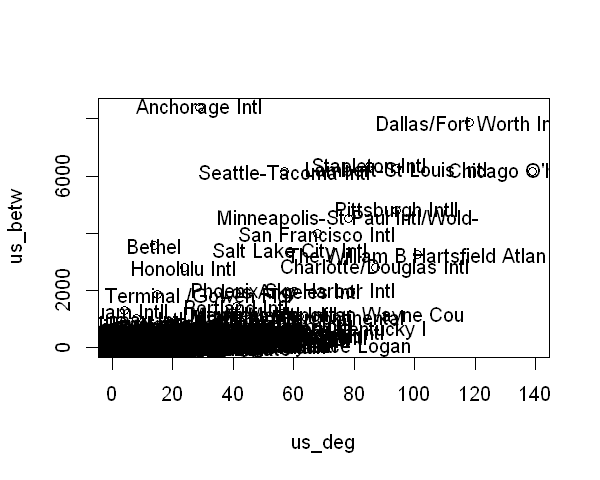

In [14]:
us_betw <- betweenness(usair,directed=FALSE)  #FALSE, not False!
cor(us_deg,us_betw)    #0.7267401 (Correlation between Degree & Betweenness)
plot(us_deg,us_betw)   #Degree-Betwwnness plot
text(us_deg,us_betw,V(usair)$id)   #Degree-Betwwnness plot with text

#Identify node with high betweenness
max_betw_usair <- induced_subgraph(usair,which(us_betw==max(us_betw)),impl='auto')
V(max_betw_usair)  #Returns the node with max betweenness

#### Degree-Betweenness plot (unweighted edges - all edges set to unity)

[1] 0.7043756

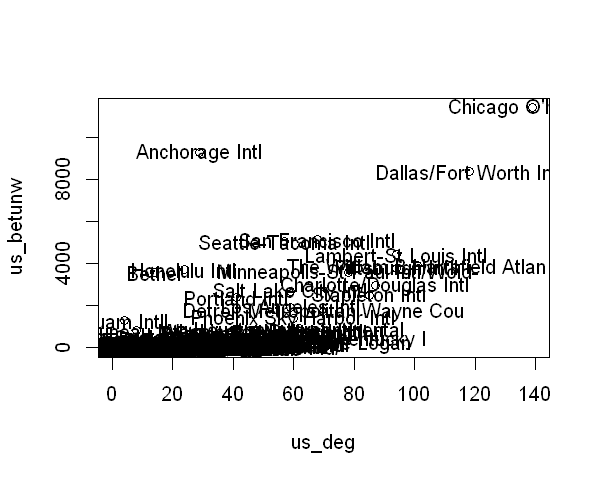

In [15]:
us_betunw <- betweenness(usair,directed=FALSE,weights=rep(1,ecount(usair)))  #Same as above, but with weights set to unity
cor(us_deg,us_betunw)  #0.7043756
plot(us_deg,us_betunw) #Degree-Betwwnness plot with weights set to Unity
text(us_deg,us_betunw,V(usair)$id)

#### Betweenness unweighted (unity weights)-Betweenness weighted plot

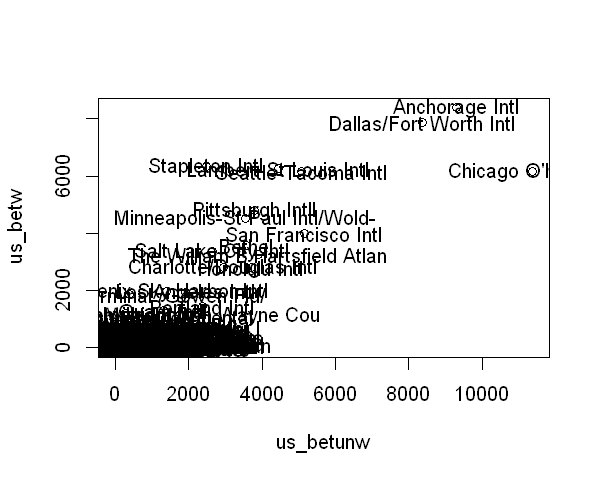

In [16]:
plot(us_betunw,us_betw) #Betweenness unweighted (unity weights)-Betweenness weighted plot 
text(us_betunw,us_betw,V(usair)$id) 

#### Strength-Betweenness plot

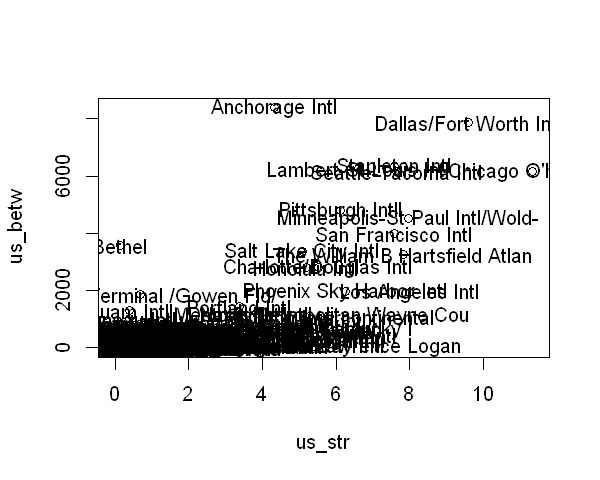

In [17]:
plot(us_str,us_betw)   #Strength-Betweenness plot
text(us_str,us_betw,V(usair)$id)

#### Set weight of edges equal to the distance (distance is the inverse of weight measure)
#### Betweenness(unweighted)-Betweenness(distance weighted) plot

[1] 0.9144206

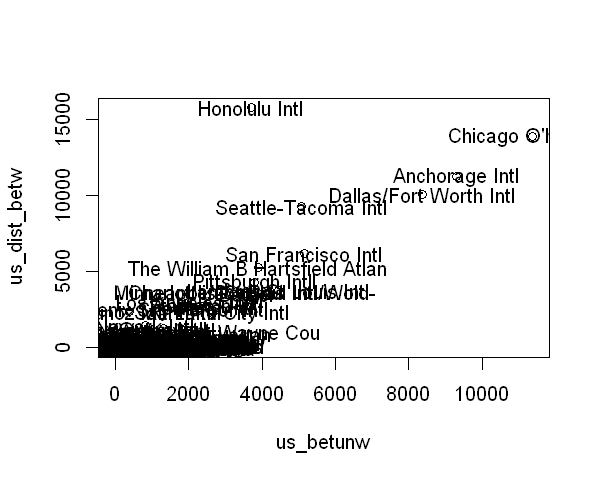

In [18]:
E(usair)$dist = 1/E(usair)$weight  #Set the parameter distance equal to inverse of weights
us_dist_betw <- betweenness(usair,directed=FALSE,weights=E(usair)$dist)  #Weights of edge equal to distance
cor(us_betunw,us_dist_betw)  #0.9144206  -- Correlation between unweighted betweenness and weighted (distance) betweenness
plot(us_betunw,us_dist_betw) #Betweenness(unweighted)-Betweenness(distance weighted) plot
text(us_betunw,us_dist_betw,V(usair)$id)

In [19]:
#plot(log(us_deg), closeness(usair))
#plot(log(us_deg), closeness(usair, weights = E(usair)$dist))

### Pagerank
#### PageRank-Betweenness plot

[1] 0.9480205

[1] 0.8334654

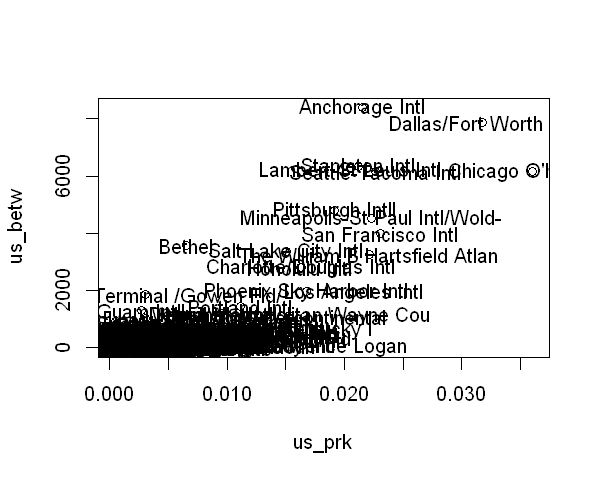

In [20]:
us_prk <- page.rank(usair,directed=FALSE,damping=0.85)$vector
cor(us_deg,us_prk)   #0.9480205
cor(us_betw,us_prk)  #0.8334654
plot(us_prk,us_betw) #PageRank-Betweenness plot
text(us_prk,us_betw,V(usair)$id)

### Subgraph 
Extract a subgraph from the graph given the condition. <br>
The condition given here is: extract those nodes whoes degree measure is greater than the mean.

In [21]:
sub_usair <- induced_subgraph(usair,which(us_deg>mean(us_deg)),impl='auto')
#which(us_deg>mean(us_deg)) is the condition for selecting subgraph
vcount(sub_usair)  #85
ecount(sub_usair)  #1311

[1] 85

[1] 1311

### Shortest Path

In [22]:
sp <- get.shortest.paths(usair, 8, c(5,15, 188, 277, 316, 323) ,mode="all", output="both")
#sp$epath
V(usair)[8]                             #From - shortest path from nodes
V(usair)[c(5,15, 188, 277, 316, 323)]   #To nodes
# 8 = Anchorage Intl
# 5 = Nome https://en.wikipedia.org/wiki/Nome_Airport
# 15= Napakiak https://en.wikipedia.org/wiki/Napakiak,_Alaska  
#188= Pueblo Memorial https://en.wikipedia.org/wiki/Pueblo_Memorial_Airport
#277= Waco Regional https://en.wikipedia.org/wiki/Waco_Regional_Airport
#316 Kahului https://en.wikipedia.org/wiki/Kahului_Airport
#323= Eugenio Maria De Hostos https://en.wikipedia.org/wiki/Eugenio_Mar%C3%ADa_de_Hostos_Airport

+ 1/332 vertex, named, from 8c9f0ce:
[1] Anchorage Intl

+ 6/332 vertices, named, from 8c9f0ce:
[1] Nome                    Napakiak                Pueblo Memorial        
[4] Waco Regional           Kahului                 Eugenio Maria De Hostos

In [23]:
#sp
#sp$vpath
#sp$epath
#unlist(sp$vpath)
#unique(unlist(sp$vpath))  #Returns the unique ids of all the airpots from source node to all six destination nodes
V(usair)[unique(unlist(sp$vpath))]  #Same as above, but returns the airport names

+ 16/332 vertices, named, from 8c9f0ce:
 [1] Anchorage Intl                Nome                         
 [3] Bethel                        Napakiak                     
 [5] Salt Lake City Intl           City Of Colorado Springs Muni
 [7] Pueblo Memorial               Dallas/Fort Worth Intl       
 [9] Waco Regional                 Honolulu Intl                
[11] Kapalua                       Kahului                      
[13] Seattle-Tacoma Intl           Miami Intl                   
[15] Luis Munoz Marin Intl         Eugenio Maria De Hostos      

# Visualizations

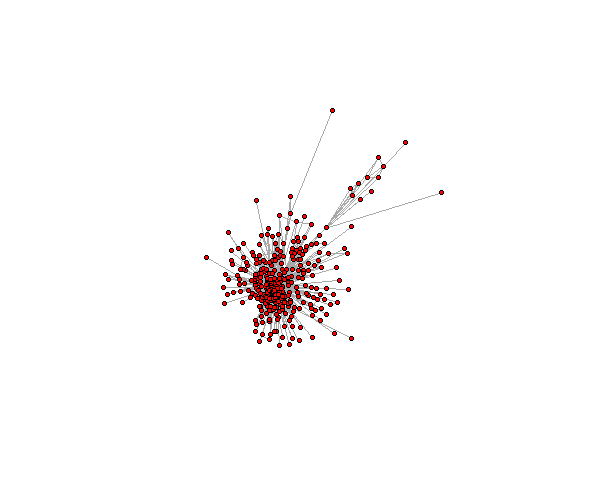

In [24]:
plot(usair, layout=layout_with_fr,vertex.size=4,vertex.label=NA,vertex.color='red',edge.arrow.size=0.5)
#layout_with_fr = Frutcherman-Reingold layout

+ 1/85 vertex, named, from 922de93:
[1] Dallas Love Field

+ 1/332 vertex, named, from 8c9f0ce:
[1] Mcnary Fld

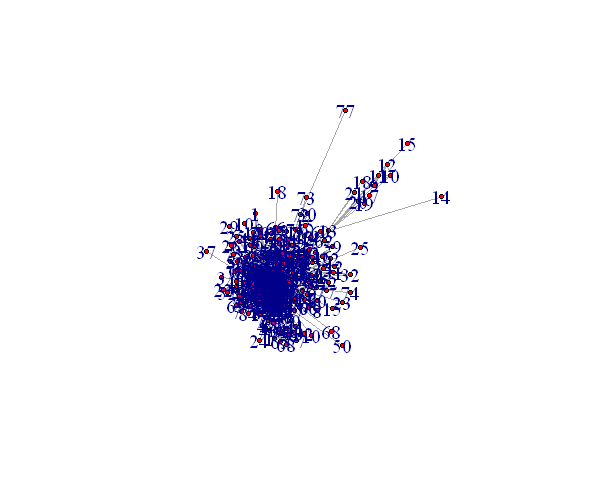

In [25]:
#Same as above, but subgraphs are labeled here using the condition vertex.label=V(sub_usair)
plot(usair, layout=layout_with_fr,vertex.size=4,vertex.label=V(sub_usair),vertex.color='red',edge.arrow.size=0.5)

V(sub_usair)[66]  #[1] Dallas Love Field
V(usair)[66]      #[1] Mcnary Fld

In [26]:
#Generate edge color variable:
ecol <- rep("gray80",ecount(usair))  #All the 2126 edges are initially set to gray80 color
ecol[unlist(sp$epath)] <- "orange"   #The shortest path edges are labeled orange

#Generate edge width variable:
ew <- rep(0.5,ecount(usair))        #All the 2126 edges are initially set to a width of 0.5
ew[unlist(sp$epath)] <- 2           #The edges in the shortest path are set to a width of 2

#Generate node color variable:
vcol <- rep("gray80",vcount(usair)) #All the 332 nodes are initially set to gray80 color
vcol[unlist(sp$vpath)] <- "gold"    #The nodes in the shortest path are set to gold color

#Generate node labels:
vlab <- rep("",vcount(usair))       #All the 332 nodes are initially set to blank
vlab[unlist(sp$vpath)] <- unlist(sp$vpath)  #Only the nodes in shortest path are labeled

#Generate node size variable:
vw <- rep(0.5, vcount(usair))      #All the nodes are initially set to a width of 0.5
vw[unlist(sp$vpath)] <- 4          #The nodes in the shortest path are set to a width of 4

## Frutcherman-Reingold layout

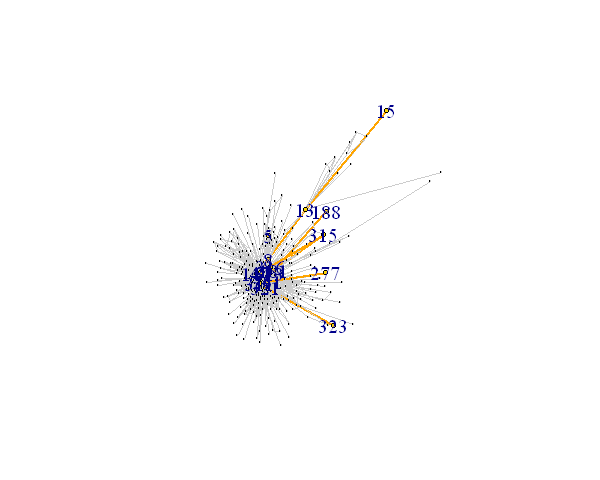

In [27]:
plot(usair,layout=layout_with_fr,vertex.color=vcol,vertex.size=vw,vertex.label=vlab,
     edge.color=ecol,edge.width=ew,edge.arrow.mode=0)
#The above plot is a weighted plot with weights set to their natural edge weights

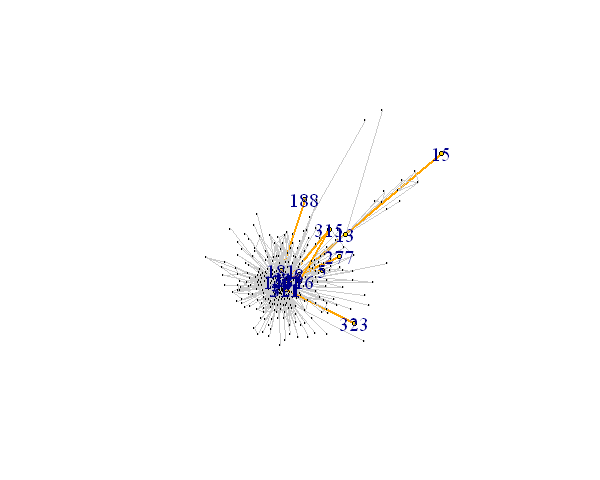

In [28]:
plot(usair,layout=layout_with_fr(usair,weight=NULL),vertex.color=vcol,vertex.size=vw,vertex.label=vlab,
     edge.color=ecol,edge.width=ew,edge.arrow.mode=0)
#Here the weights are set to unity/Null

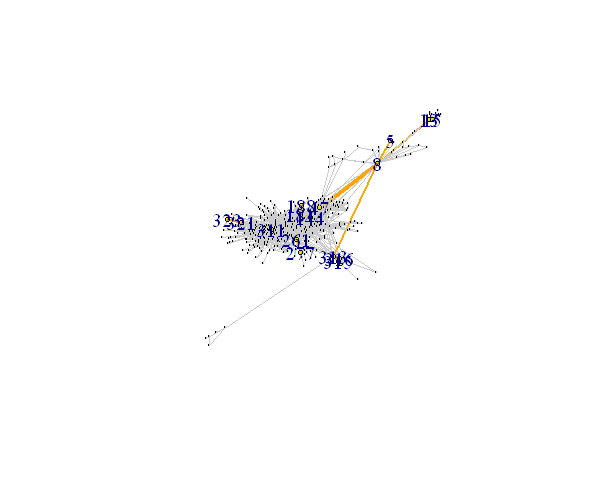

In [29]:
plot(usair,layout=layout_with_fr(usair,weight=E(usair)$dist),vertex.color=vcol,vertex.size=vw,vertex.label=vlab,
     edge.color=ecol,edge.width=ew,edge.arrow.mode=0)
#Here the weights are set equal to the distance between nodes

## Force-directed layout

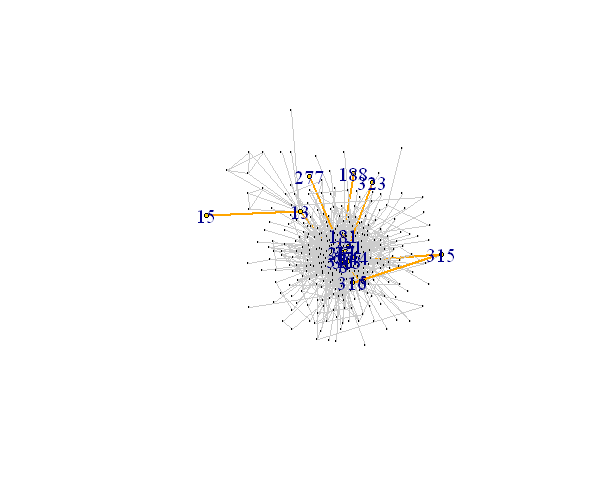

In [30]:
plot(usair,layout=layout_with_drl,vertex.color=vcol,vertex.size=vw,vertex.label=vlab,
     edge.color=ecol,edge.width=ew,edge.arrow.mode=0)
#The above plot is a weighted plot with weights set to their natural edge weights

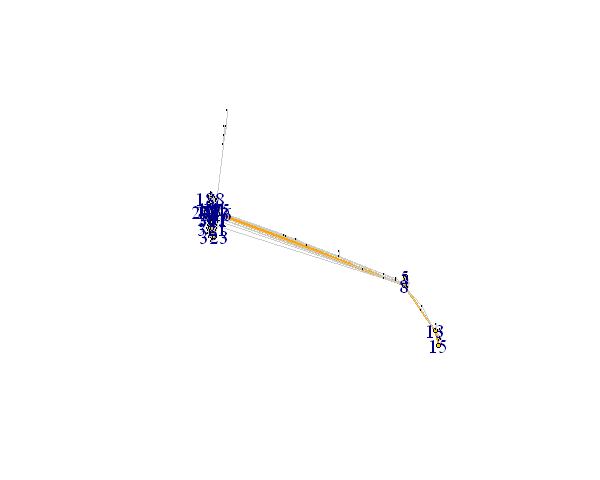

In [31]:
plot(usair,layout=layout_with_drl(usair,weight=NULL),vertex.color=vcol,vertex.size=vw,vertex.label=vlab,
     edge.color=ecol,edge.width=ew,edge.arrow.mode=0)
#Here the weights are set to unity/Null

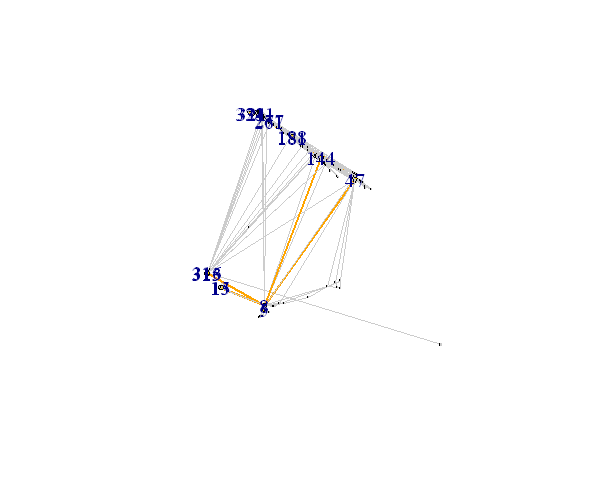

In [32]:
plot(usair,layout=layout_with_drl(usair,weight=E(usair)$dist),vertex.color=vcol,vertex.size=vw,vertex.label=vlab,
     edge.color=ecol,edge.width=ew,edge.arrow.mode=0)
#Here the weights are set equal to the distance between nodes

## Kamada-Kawai

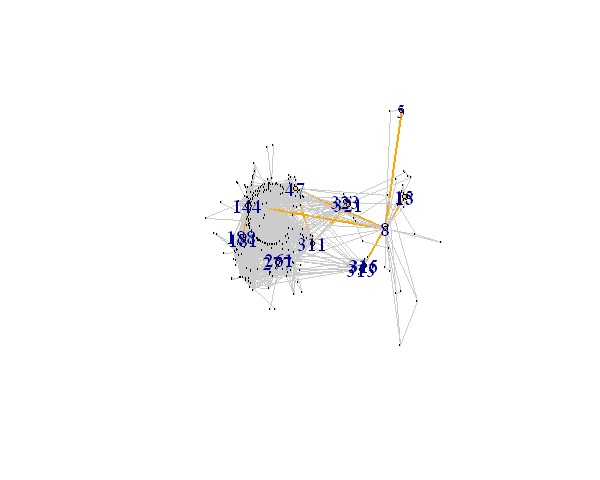

In [33]:
plot(usair,layout=layout_with_kk,vertex.color=vcol,vertex.size=vw,vertex.label=vlab,
     edge.color=ecol,edge.width=ew,edge.arrow.mode=0)
#The above plot is a weighted plot with weights set to their natural edge weights

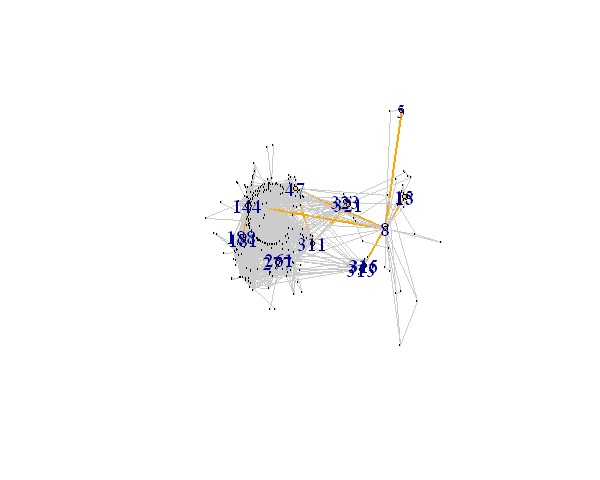

In [34]:
plot(usair,layout=layout_with_kk(usair,weight=NULL),vertex.color=vcol,vertex.size=vw,vertex.label=vlab,
     edge.color=ecol,edge.width=ew,edge.arrow.mode=0)
#Here the weights are set to unity/Null

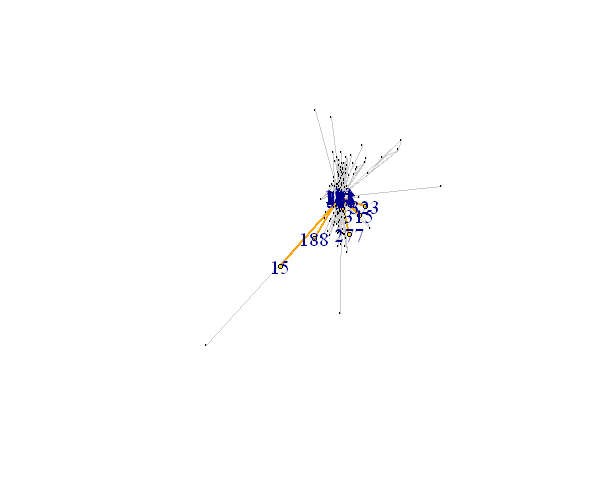

In [35]:
plot(usair,layout=layout_with_kk(usair,weight=E(usair)$dist),vertex.color=vcol,vertex.size=vw,vertex.label=vlab,
     edge.color=ecol,edge.width=ew,edge.arrow.mode=0)
#Here the weights are set equal to the distance between nodes

In [36]:
neighborhood(usair, nodes=323)  #From the graph, it can be seen that node 323 has only one neighbor

[[1]]
+ 2/332 vertices, named, from 8c9f0ce:
[1] Eugenio Maria De Hostos Luis Munoz Marin Intl  


## Remove node with high betweenness centrality and see the changes in the graph

[1] 332

[1] 2126

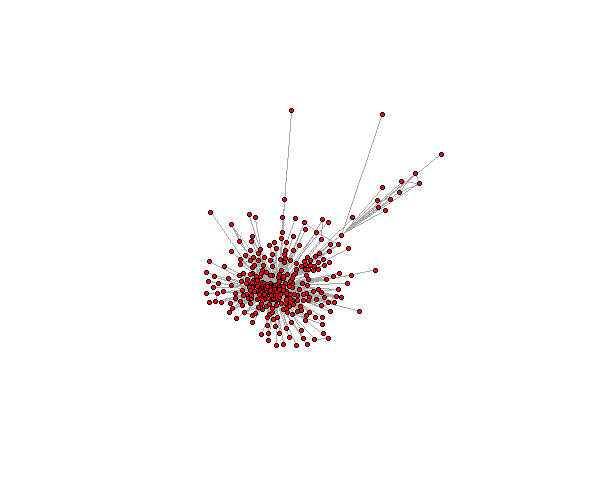

In [37]:
#Original
vcount(usair)  #332
ecount(usair)  #2126
us_betw <- betweenness(usair,directed=FALSE)
plot(usair, layout=layout_with_fr,vertex.size=4,vertex.label=NA,vertex.color='red',edge.arrow.size=0.5) #Original

[1] 331

[1] 2097

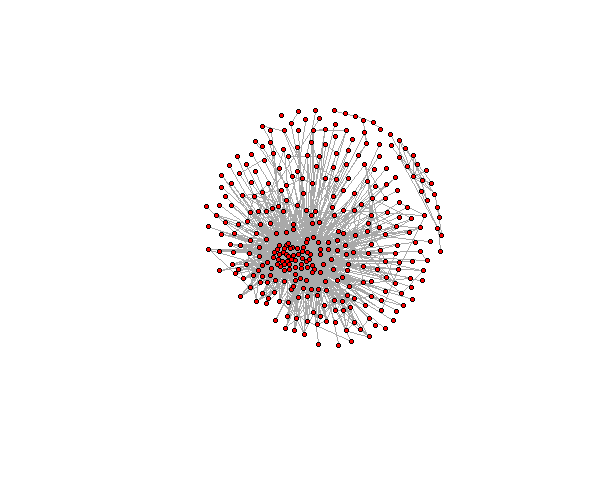

In [38]:
#Remove node with highest betweenness centrality (N-1)
rem_1stdeg_usair <- induced_subgraph(usair,which(us_betw<max(us_betw)),impl='auto')
vcount(rem_1stdeg_usair) #331
ecount(rem_1stdeg_usair) #2097
plot(rem_1stdeg_usair, layout=layout_with_fr,vertex.size=4,vertex.label=NA,vertex.color='red',edge.arrow.size=0.5) #1st deg removed